### MinMax Pipeline ###

In [1]:
## loading useful stuff

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
from sklearn import datasets
from scipy.stats import iqr
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv("Use_This.csv", index_col=0, header=0)
data.head()

,Year,Assigned_ID,Bank,IncRat,UPB,LTV,MortDate,Purpose,Coop,Product,...,LTV_M,Purpose_M,Coop_M,Product_M,Occup_M,Back_M,BoCreditScor_M,PropType_M,Loan_Multiplier,Portfolio_Worthy
0,2015,1997542,Atlanta,1.6984,334244,1.00,2015,2,2,1,...,0.406,1.61,1.0,0.879,1.0,2.020,1.760,1.0,2.042701,1
1,2015,1997543,Atlanta,2.4514,126790,0.59,2015,1,2,1,...,0.255,1.00,1.0,0.879,1.0,1.000,0.743,1.0,0.166540,1
2,2015,1997544,Atlanta,1.2603,173761,0.65,2015,2,2,1,...,0.371,1.61,1.0,0.879,1.0,1.000,2.850,1.0,1.496351,1
3,2015,1997545,Atlanta,1.5047,103961,0.97,2015,2,2,1,...,0.406,1.61,1.0,0.879,1.0,1.000,0.743,1.0,0.426903,1
4,2015,1997546,Atlanta,1.5774,411696,0.84,2015,1,2,1,...,0.406,1.00,1.0,0.879,1.0,2.345,0.743,1.0,0.621794,1


In [2]:
# Splitting data into target/data variables

target = data.Portfolio_Worthy
data_year = data.Year
data_assigned = data.Assigned_ID
data_bank = data.Bank
data_mortdate = data.MortDate
data = data.drop(columns=['Year','Assigned_ID','Bank','MortDate','Portfolio_Worthy','IncRat','UPB','LTV','Purpose','Coop','Product','Occup','Back','BoCreditScor','PropType','FedGuar','Front'], axis=1)

In [4]:
data.head()

,LTV_M,Purpose_M,Coop_M,Product_M,Occup_M,Back_M,BoCreditScor_M,PropType_M,Loan_Multiplier
0,0.406,1.61,1.0,0.879,1.0,2.020,1.760,1.0,2.042701
1,0.255,1.00,1.0,0.879,1.0,1.000,0.743,1.0,0.166540
2,0.371,1.61,1.0,0.879,1.0,1.000,2.850,1.0,1.496351
3,0.406,1.61,1.0,0.879,1.0,1.000,0.743,1.0,0.426903
4,0.406,1.00,1.0,0.879,1.0,2.345,0.743,1.0,0.621794


#### Outliers ####

__There are no outliers, since everything is binned for the features.__

#### Normalization ####

In [5]:
# Checking the mean
data.mean()

LTV_M              0.753344
Purpose_M          1.335444
Coop_M             1.000000
Product_M          0.879000
Occup_M            1.005944
Back_M             1.354748
BoCreditScor_M     1.315574
PropType_M         1.005107
Loan_Multiplier    1.736804
dtype: float64

#### Skewness ####

In [6]:
# Checking Skewness
data.skew()

LTV_M               1.871665
Purpose_M          -0.200638
Coop_M              0.000000
Product_M           0.000000
Occup_M             6.939869
Back_M              0.771986
BoCreditScor_M      2.312915
PropType_M         16.156231
Loan_Multiplier     5.465186
dtype: float64

__These skew values all look good. 'PropType_M' and 'Occup_M' are categorical variables, so I do not have to change the skew for them.__

In [7]:
# Printing the data
data.head()

,LTV_M,Purpose_M,Coop_M,Product_M,Occup_M,Back_M,BoCreditScor_M,PropType_M,Loan_Multiplier
0,0.406,1.61,1.0,0.879,1.0,2.020,1.760,1.0,2.042701
1,0.255,1.00,1.0,0.879,1.0,1.000,0.743,1.0,0.166540
2,0.371,1.61,1.0,0.879,1.0,1.000,2.850,1.0,1.496351
3,0.406,1.61,1.0,0.879,1.0,1.000,0.743,1.0,0.426903
4,0.406,1.00,1.0,0.879,1.0,2.345,0.743,1.0,0.621794


In [8]:
# Concatinting the target back to the data set
data = pd.concat([data, target], axis=1, join='inner')
data = pd.concat([data, data_year], axis=1, join='inner')
data = pd.concat([data, data_bank], axis=1, join='inner')
data = pd.concat([data, data_mortdate], axis=1, join='inner')
data = pd.concat([data, data_assigned], axis=1, join='inner')
data.head()

,LTV_M,Purpose_M,Coop_M,Product_M,Occup_M,Back_M,BoCreditScor_M,PropType_M,Loan_Multiplier,Portfolio_Worthy,Year,Bank,MortDate,Assigned_ID
0,0.406,1.61,1.0,0.879,1.0,2.020,1.760,1.0,2.042701,1,2015,Atlanta,2015,1997542
1,0.255,1.00,1.0,0.879,1.0,1.000,0.743,1.0,0.166540,1,2015,Atlanta,2015,1997543
2,0.371,1.61,1.0,0.879,1.0,1.000,2.850,1.0,1.496351,1,2015,Atlanta,2015,1997544
3,0.406,1.61,1.0,0.879,1.0,1.000,0.743,1.0,0.426903,1,2015,Atlanta,2015,1997545
4,0.406,1.00,1.0,0.879,1.0,2.345,0.743,1.0,0.621794,1,2015,Atlanta,2015,1997546


In [9]:
# Exporting data to csv file
data.to_csv("MinMax.csv", sep=',')

#### Correlation ####

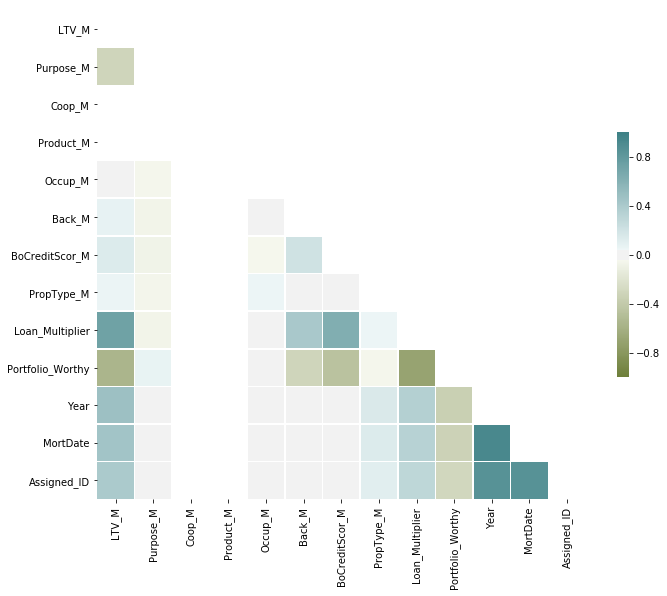

In [10]:
# Checking if the correlation changed
### WE ARE USING THIS CODE FROM COMPETITION 1

## We will make it look nicer to the eye
# Visualizing a Correlation Matrix
correlation_visual = data.corr(method='spearman')

# Have to generate a mask(hide) for the upper triangle
hide = np.zeros_like(correlation_visual, dtype=np.bool)
hide[np.triu_indices_from(hide)] = True

# Setting the subplot for the correlation matrix
f , ax = plt.subplots(figsize=(11,9))

# Generating a diverging colormap
cmap = sns.diverging_palette(100, 200, as_cmap=True)

# Adding the heatmap
sns.heatmap(correlation_visual, mask=hide, cmap=cmap, vmin=-1,vmax=1, center=0, square=True, linewidths=.6, cbar_kws={"shrink": .5})

In [11]:
# Numerical correlation
print(data.corr(method='spearman'))

                     LTV_M  Purpose_M  Coop_M  Product_M   Occup_M    Back_M  \
LTV_M             1.000000  -0.309336     NaN        NaN -0.012058  0.082064   
Purpose_M        -0.309336   1.000000     NaN        NaN -0.052912 -0.067822   
Coop_M                 NaN        NaN     NaN        NaN       NaN       NaN   
Product_M              NaN        NaN     NaN        NaN       NaN       NaN   
Occup_M          -0.012058  -0.052912     NaN        NaN  1.000000 -0.001132   
Back_M            0.082064  -0.067822     NaN        NaN -0.001132  1.000000   
BoCreditScor_M    0.135189  -0.070769     NaN        NaN -0.042773  0.205991   
PropType_M        0.056416  -0.054876     NaN        NaN  0.047691  0.031617   
Loan_Multiplier   0.733775  -0.068082     NaN        NaN -0.009537  0.416486   
Portfolio_Worthy -0.555767   0.076539     NaN        NaN  0.027535 -0.311738   
Year              0.477738   0.012052     NaN        NaN  0.000191  0.018032   
MortDate          0.447109   0.013525   